## Red wine Quality

### Data Context

- Kaggle의 레드 와인 퀄리티 데이터셋은 포르투갈산 "Vinho Verde" 레드와인과 화이트와인에 대한 두 가지 데이터셋으로 구성. 데이터셋은 Cortez et al., 2009년 연구에 기반한 것으로, 포도 종류, 와인 브랜드, 판매 가격 등과 같은 정보는 개인정보 보호 및 물류 문제로 인해 포함되어 있지 않음. 
- 물리화학적(입력 변수) 및 감각적(출력 변수) 특성에 초점을 맞추고 있음. 이 데이터셋은 분류 혹은 회귀 작업으로 활용될 수 있으며, 클래스는 정렬되어 있지만 균형이 맞지 않다. 즉, 우수하거나 불량한 와인보다는 보통의 와인이 훨씬 더 많다.
- 이 데이터셋을 사용하여 다양한 예측 모델을 개발하고, 와인의 품질을 결정하는데 중요한 요소가 무엇인지를 탐색할 수 있다.

### Data Description

1 - fixed acidity <br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 – alcohol<br>

**Output variable (based on sensory data):**<br>
12 - quality (score between 0 and 10)

### 1. importing the libraries

In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns


#ML Libraries that we will be using
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

### 2. Loading & Reading the Libraries

In [5]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#항상 dataset의 copy본을 가지는 건 좋다!
df_cp = df.copy()

### 3. Data inspection

**(자유롭게 dataset 살펴보기)** <br>
1. dataset의 shape
2. 연속형/ 이산형 피처 구분
3. info
4. unique values 구분 (output = quality count)

In [187]:
df_cp.shape

(1599, 12)

In [188]:
NumericalCols=df_cp.describe().columns

In [189]:
print("Numerical Variables Columns: ", NumericalCols)

Numerical Variables Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [190]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [191]:
df_cp['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### 4. Basic Statics

각 피처별로 개수, 평균, max, min 등 통계학적 분포 분석

In [192]:
df_cp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 5. Feature Analysis & Finding Outliers

1. 시각화 확인 후, 이상치 제거
2. 이상치 제거 후 시각화 결과 확인

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/37589845.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


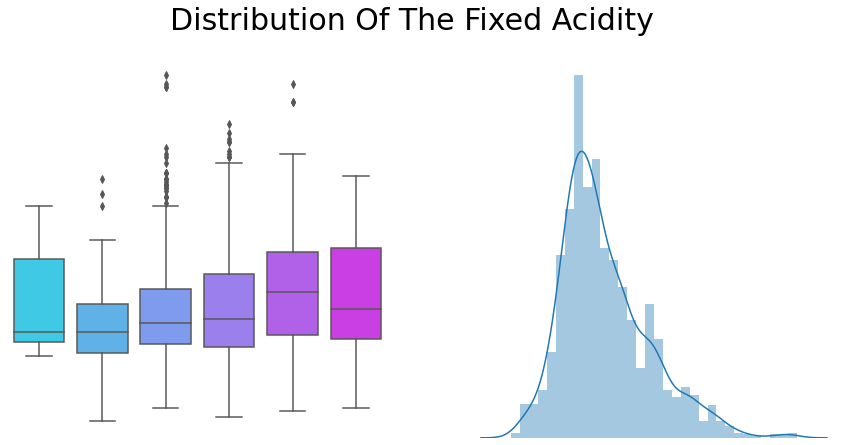

In [7]:
# boxplot과 히스토그램 출력
fig = plt.figure(figsize=(15,7))
fig.suptitle('Distribution Of The Fixed Acidity', fontsize = 30)

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df_cp["quality"], y=df_cp["fixed acidity"], palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df_cp["fixed acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

**boxplot과 distribution chart(히스토그램)을 통해 outlier 탐지. log transformation을 통해 outlier를 handle**

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/2722185673.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


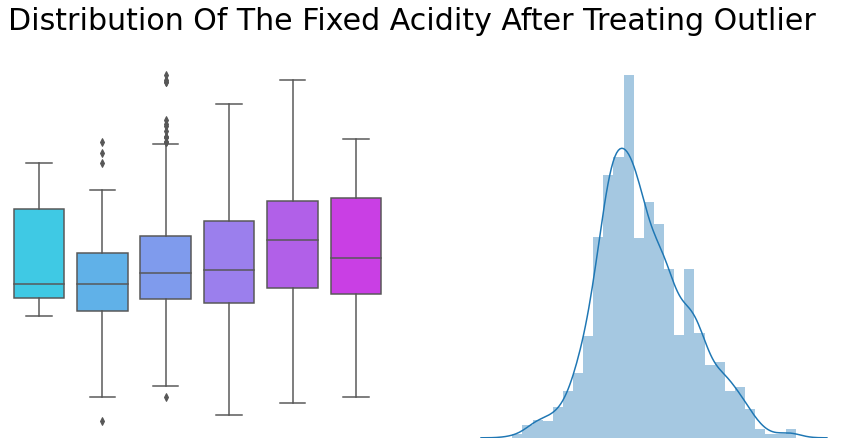

In [8]:
#이상치 제거 후 시각화 
df_cp["Log_fixed acidity"]=np.log(df_cp["fixed acidity"])

fig = plt.figure(figsize=(15,7))
fig.suptitle('Distribution Of The Fixed Acidity After Treating Outlier', fontsize=30)

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df_cp["quality"], y=df_cp["Log_fixed acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df_cp["Log_fixed acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

이상치가 제거되고 정규분포에 가까운 분포를 보임. 


### 위에서 이상치를 처리한 Fixed Acidity와 같은 방법으로, 다음 목록에 있는 피처(Feature)들에 대해서도 시각화 과정을 진행하고 이상치가 발견되면 로그 변환을 통해 처리하자

<br>
- Volatile Acidity <br>
- Critic Acidity <br>
- Residual Sugar <br>
- Chlorides <br>
- Free Sulfurdioxide <br>
- Total Sulfur dioxide <br>
- Density <br>
- pH <br>
- Sulphates <br>
- Alcohol

In [195]:
# 다른 피처 시각화 / 이상치 처리 코드

def before_log(df,col):
    # boxplot과 히스토그램 출력
    fig = plt.figure(figsize=(15,7))
    fig.suptitle('Distribution Of'+col, fontsize = 30)

    ax1 = fig.add_subplot(121)
    ax1 = sns.boxplot(x=df["quality"], y=df[col], palette="cool")
    plt.axis('off')

    ax2 = fig.add_subplot(122)
    x=df[col]
    ax2 = sns.distplot(x)
    plt.axis('off')
    plt.show()

In [9]:
def after_log(df,col):#이상치 제거 후 시각화 
    df["Log_"+col]=np.log(df[col])

    fig = plt.figure(figsize=(15,7))
    fig.suptitle('Distribution Of '+col+' After Treating Outlier', fontsize=30)

    ax1 = fig.add_subplot(121)
    ax1 = sns.boxplot(x=df["quality"], y=df[col],palette="cool")
    plt.axis('off')

    ax2 = fig.add_subplot(122)
    x=df["Log_"+col]
    ax2 = sns.distplot(x)
    plt.axis('off')
    plt.show()

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


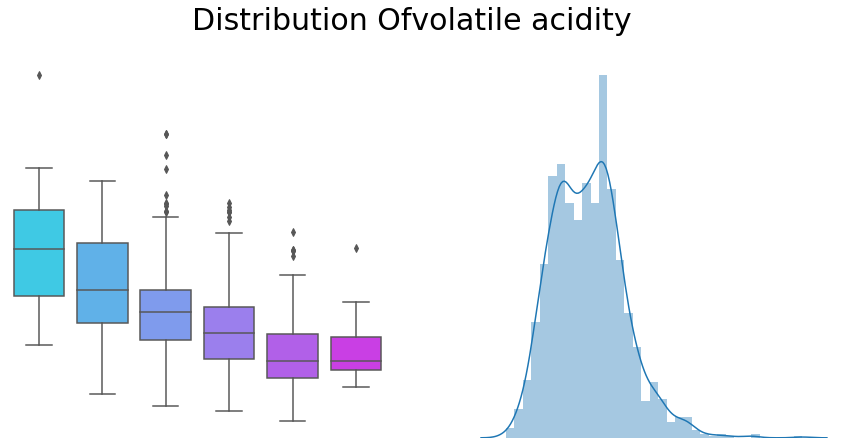

In [197]:
before_log(df_cp,'volatile acidity')

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


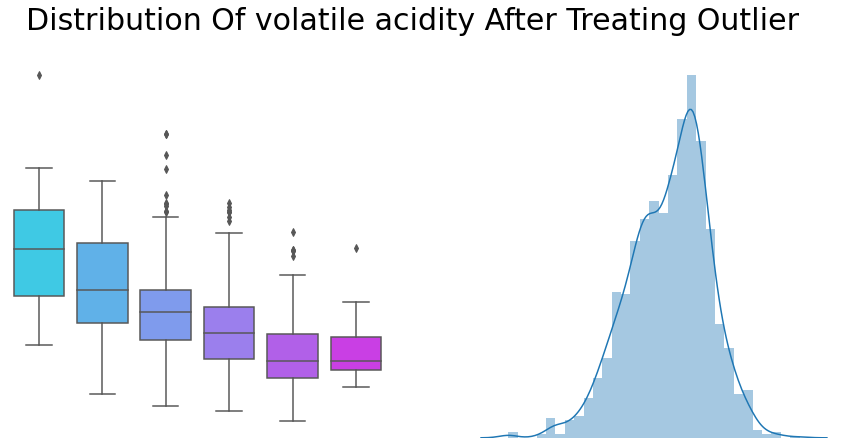

In [198]:
after_log(df_cp,'volatile acidity')

In [199]:
df_cp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Log_fixed acidity',
       'Log_volatile acidity'],
      dtype='object')

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


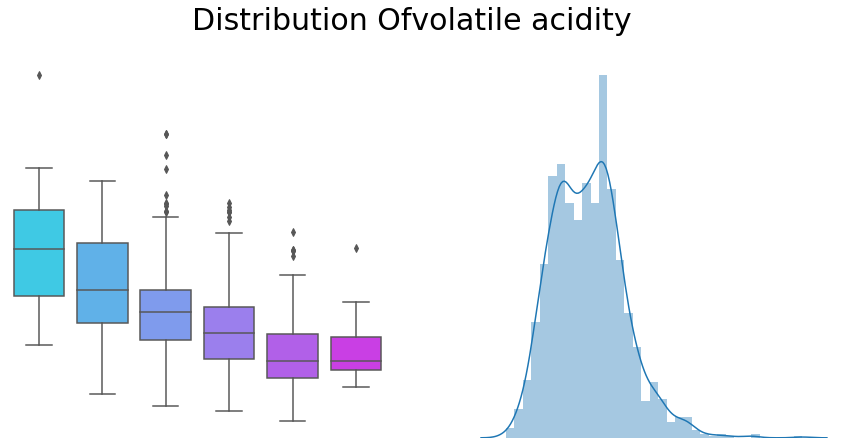

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


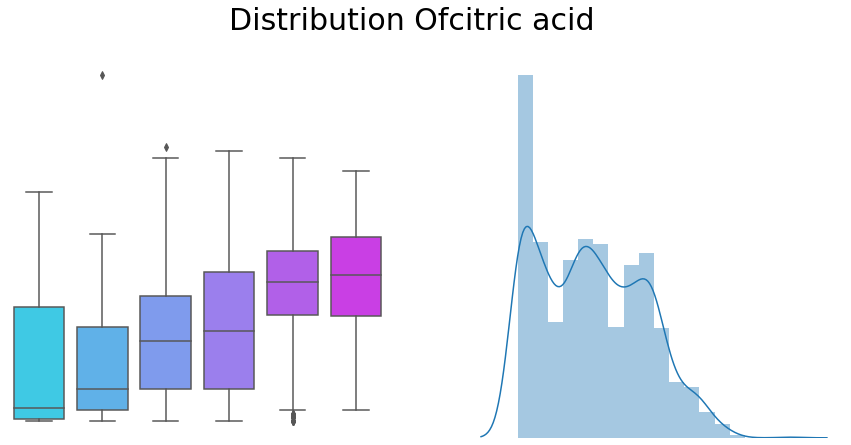

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


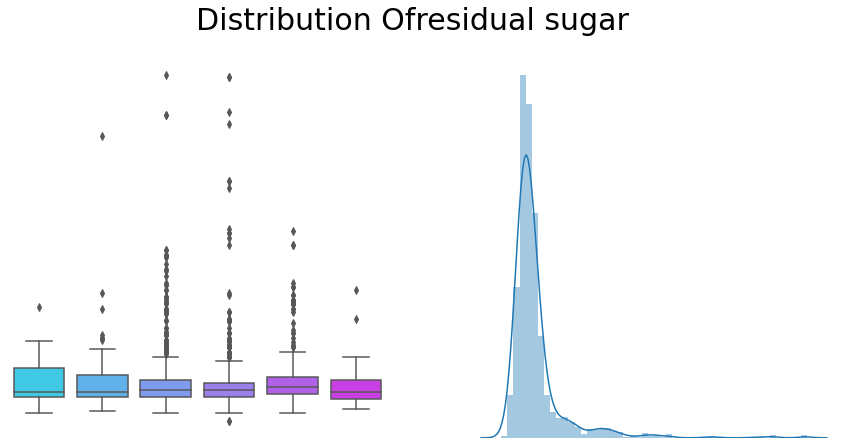

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


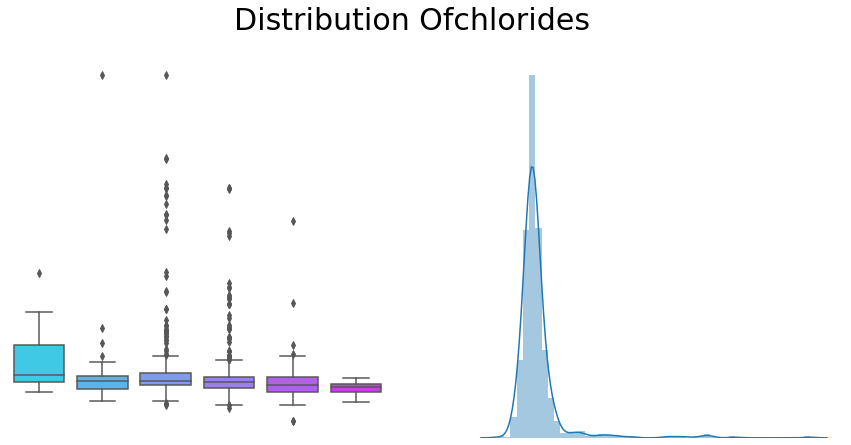

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


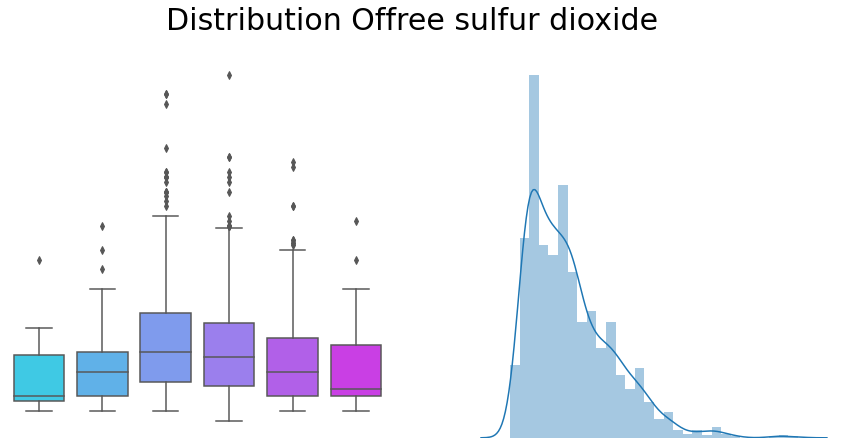

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


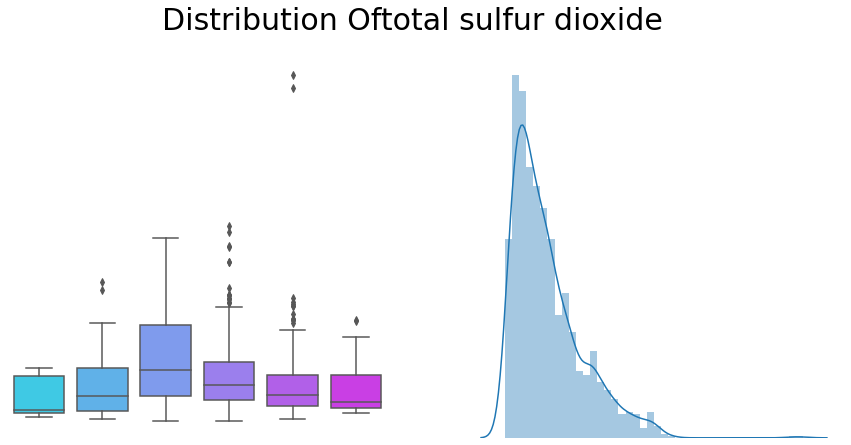

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


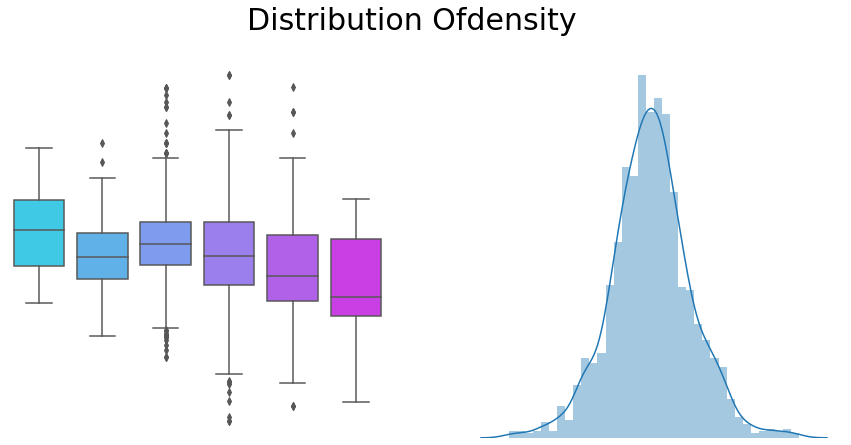

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


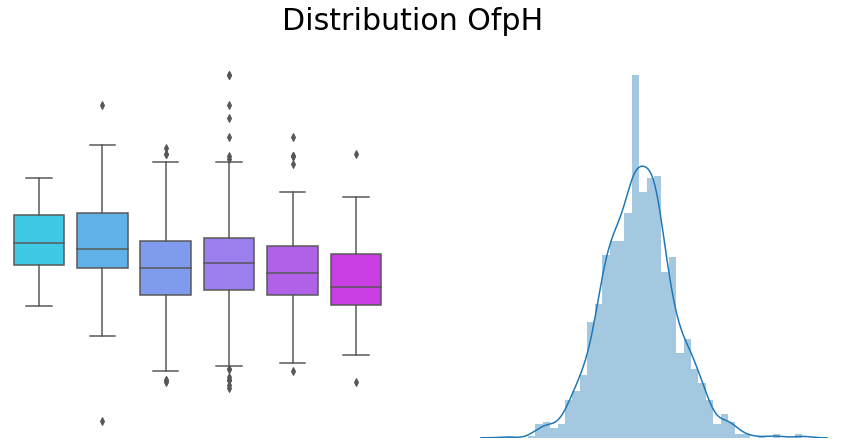

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


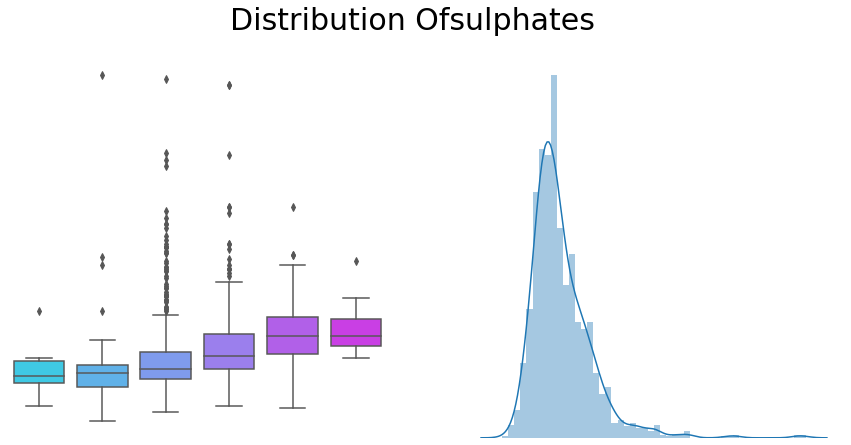

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_198140/18548338.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


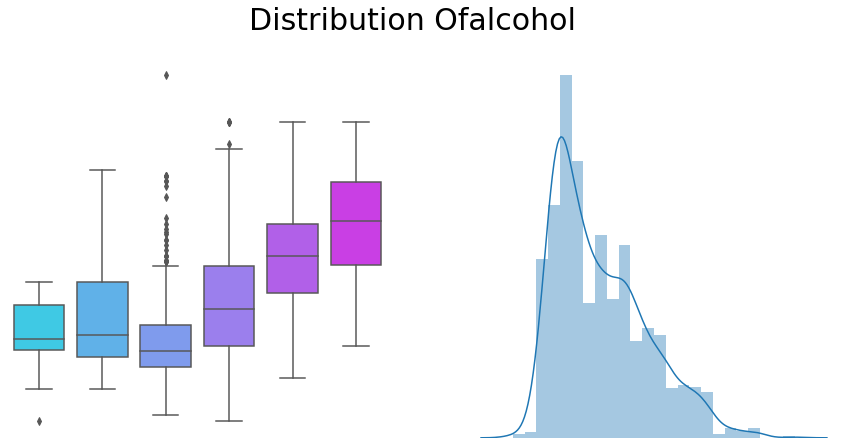

In [200]:
col_list=['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide'
          ,'total sulfur dioxide','density','pH','sulphates','alcohol']
for i in col_list:
    before_log(df_cp,i)

In [201]:
df_cp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Log_fixed acidity',
       'Log_volatile acidity'],
      dtype='object')

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


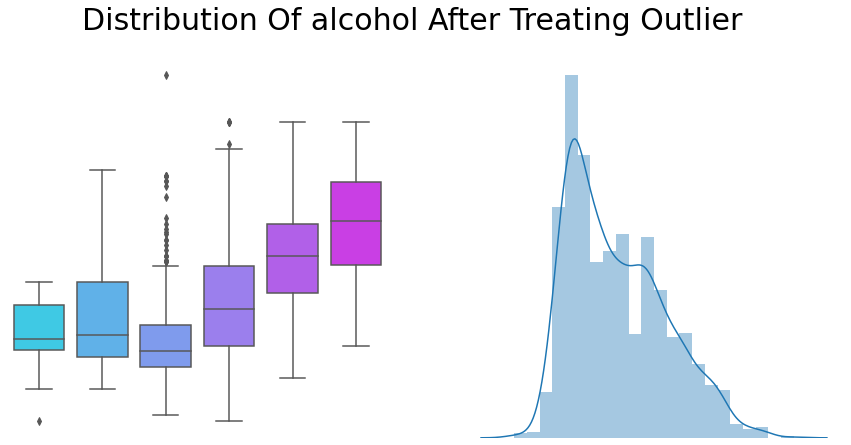

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


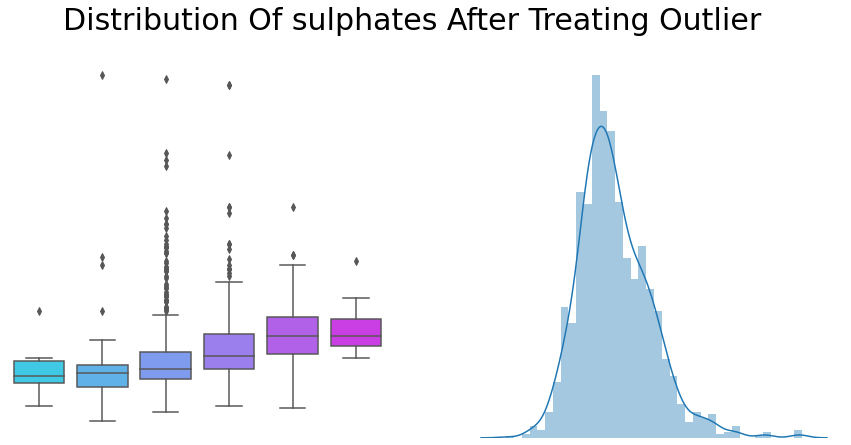

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


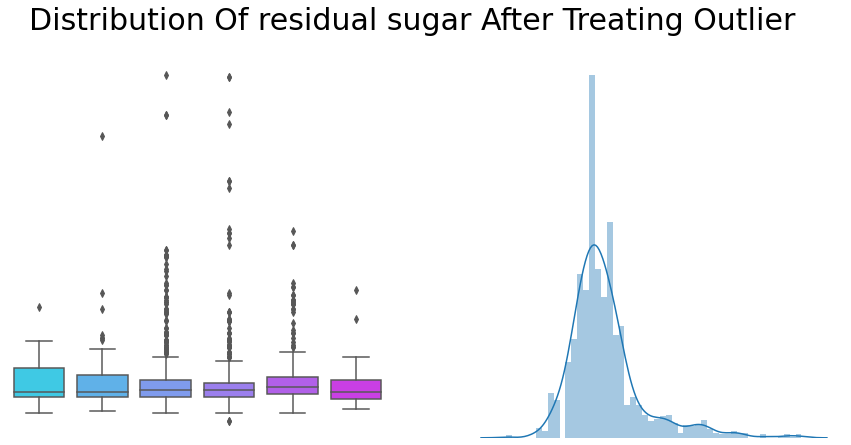

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


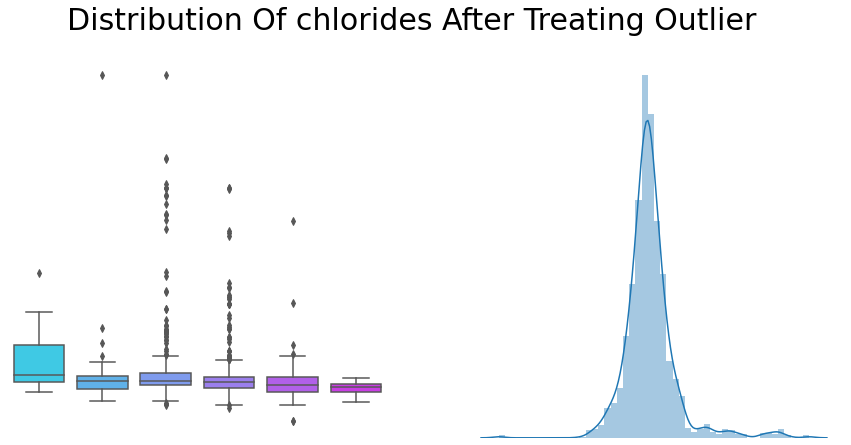

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


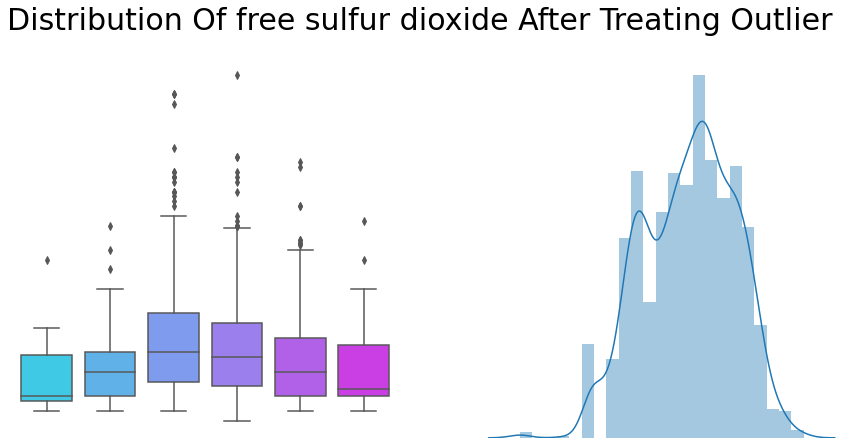

C:\Users\JaneNahm\AppData\Local\Temp/ipykernel_173716/1137197947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x)


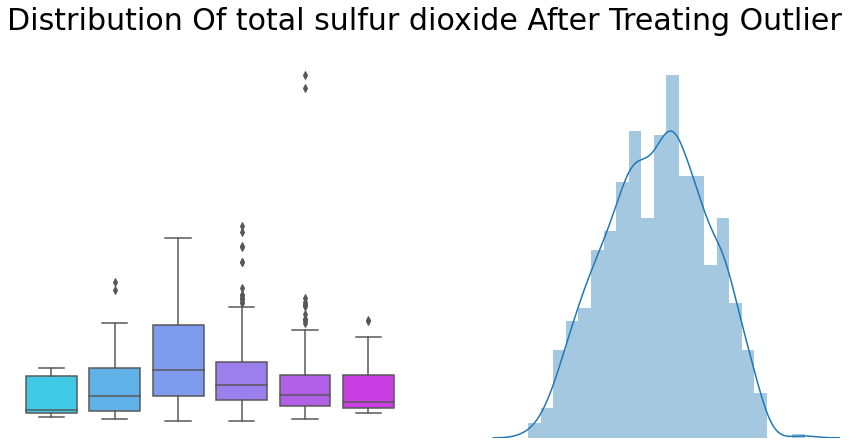

In [10]:
need_to_loged_cols=['alcohol','sulphates','residual sugar','chlorides','free sulfur dioxide'
          ,'total sulfur dioxide']

for i in need_to_loged_cols:
    after_log(df_cp,i)

In [11]:
df_cp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Log_fixed acidity,Log_alcohol,Log_sulphates,Log_residual sugar,Log_chlorides,Log_free sulfur dioxide,Log_total sulfur dioxide
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.001480,2.240710,-0.579818,0.641854,-2.577022,2.397895,3.526361
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.054124,2.282382,-0.385662,0.955511,-2.322788,3.218876,4.204693
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.054124,2.282382,-0.430783,0.832909,-2.385967,2.708050,3.988984
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2.415914,2.282382,-0.544727,0.641854,-2.590267,2.833213,4.094345
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.001480,2.240710,-0.579818,0.641854,-2.577022,2.397895,3.526361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.824549,2.351375,-0.544727,0.693147,-2.407946,3.465736,3.784190
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.774952,2.415914,-0.274437,0.788457,-2.780621,3.663562,3.931826
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.840550,2.397895,-0.287682,0.832909,-2.577022,3.367296,3.688879
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.774952,2.322388,-0.342490,0.693147,-2.590267,3.465736,3.784190


### 6. Feature Transformation

quality class 분포 시각화

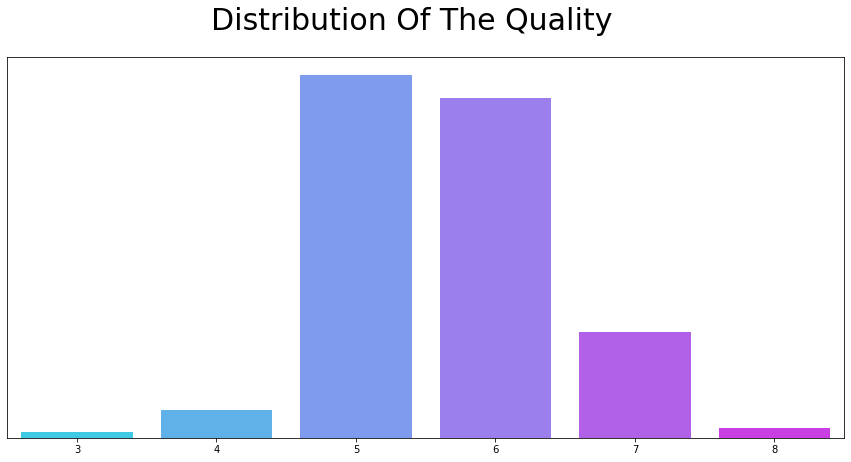

In [204]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Distribution Of The Quality', fontsize=30)
ax = sns.barplot(y = df['quality'].value_counts().values.tolist(), 
                      x = df['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

bad Quality = 3 ~ 6 class <br>
good Quality = 7 ~ 8 class <br>
로 구분하자

In [12]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

df['quality'].replace({'bad':0, 'good':1}, inplace=True)

In [13]:
df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

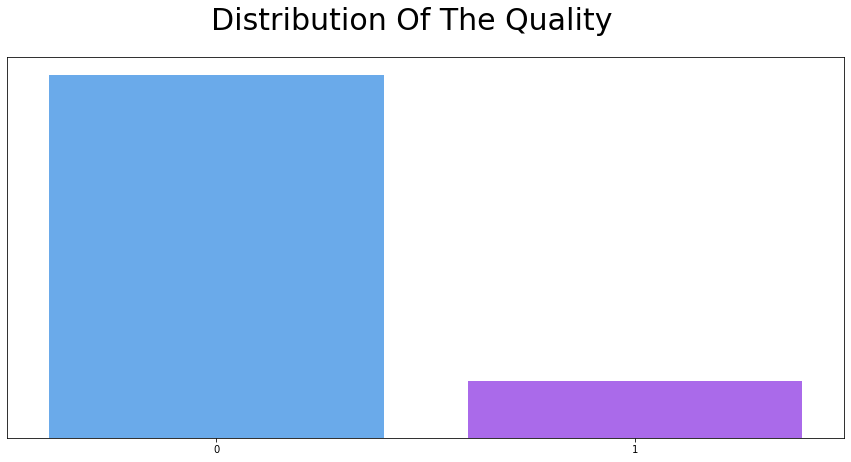

In [14]:
fig = plt.figure(figsize=(15,7))
fig.suptitle('Distribution Of The Quality', fontsize=30)

ax = sns.barplot(y = df['quality'].value_counts().values.tolist(), 
                      x = df['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

### Quiz 1. 왜 quality class를 0(negative), 1(positive)로 구분할까?
> 분포가 극명하게 갈리지 않아서....<br>분석의 목적 자체가 좋은 와인 구별하기 위함이기에

### 7. Dropping the Redundant column

In [208]:
df_cp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Log_fixed acidity',
       'Log_volatile acidity', 'Log_alcohol', 'Log_sulphates',
       'Log_residual sugar', 'Log_chlorides', 'Log_free sulfur dioxide',
       'Log_total sulfur dioxide'],
      dtype='object')

In [15]:
# 앞서 log 변환으로 이상치 처리한 피처들을 drop
# 로그 변환된 피처들만 남기기
# 아래는 예시입니다. 각자 로그 변환한 피처들만 drop해주세요!

df_cp.drop(columns =['alcohol','sulphates','residual sugar','chlorides','free sulfur dioxide'
          ,'total sulfur dioxide'],axis=True,inplace =True)

#Rearrangement of the columns
df_cp = df_cp[['fixed acidity', 'volatile acidity', 'citric acid', 'density',
       'pH', 'quality', 'Log_fixed acidity',
       'Log_volatile acidity', 'Log_alcohol', 'Log_sulphates',
       'Log_residual sugar', 'Log_chlorides', 'Log_free sulfur dioxide',
       'Log_total sulfur dioxide']]

KeyError: "['Log_volatile acidity'] not in index"

In [16]:
df_cp

,fixed acidity,volatile acidity,citric acid,density,pH,quality,Log_fixed acidity,Log_alcohol,Log_sulphates,Log_residual sugar,Log_chlorides,Log_free sulfur dioxide,Log_total sulfur dioxide
0,7.4,0.700,0.00,0.99780,3.51,5,2.001480,2.240710,-0.579818,0.641854,-2.577022,2.397895,3.526361
1,7.8,0.880,0.00,0.99680,3.20,5,2.054124,2.282382,-0.385662,0.955511,-2.322788,3.218876,4.204693
2,7.8,0.760,0.04,0.99700,3.26,5,2.054124,2.282382,-0.430783,0.832909,-2.385967,2.708050,3.988984
3,11.2,0.280,0.56,0.99800,3.16,6,2.415914,2.282382,-0.544727,0.641854,-2.590267,2.833213,4.094345
4,7.4,0.700,0.00,0.99780,3.51,5,2.001480,2.240710,-0.579818,0.641854,-2.577022,2.397895,3.526361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.99490,3.45,5,1.824549,2.351375,-0.544727,0.693147,-2.407946,3.465736,3.784190
1595,5.9,0.550,0.10,0.99512,3.52,6,1.774952,2.415914,-0.274437,0.788457,-2.780621,3.663562,3.931826
1596,6.3,0.510,0.13,0.99574,3.42,6,1.840550,2.397895,-0.287682,0.832909,-2.577022,3.367296,3.688879
1597,5.9,0.645,0.12,0.99547,3.57,5,1.774952,2.322388,-0.342490,0.693147,-2.590267,3.465736,3.784190


In [211]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 8. Correlation Analysis
이 단계는 참고만 하세요. 
각 피처별로 서로의 상관관계를 분석한 파트입니다.
시각화만 진행했으니 실행 없이 넘어가셔도 됩니다~!

In [212]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.pairplot(df_cp,hue='quality',palette="cool")

KeyboardInterrupt: 

<Axes: >

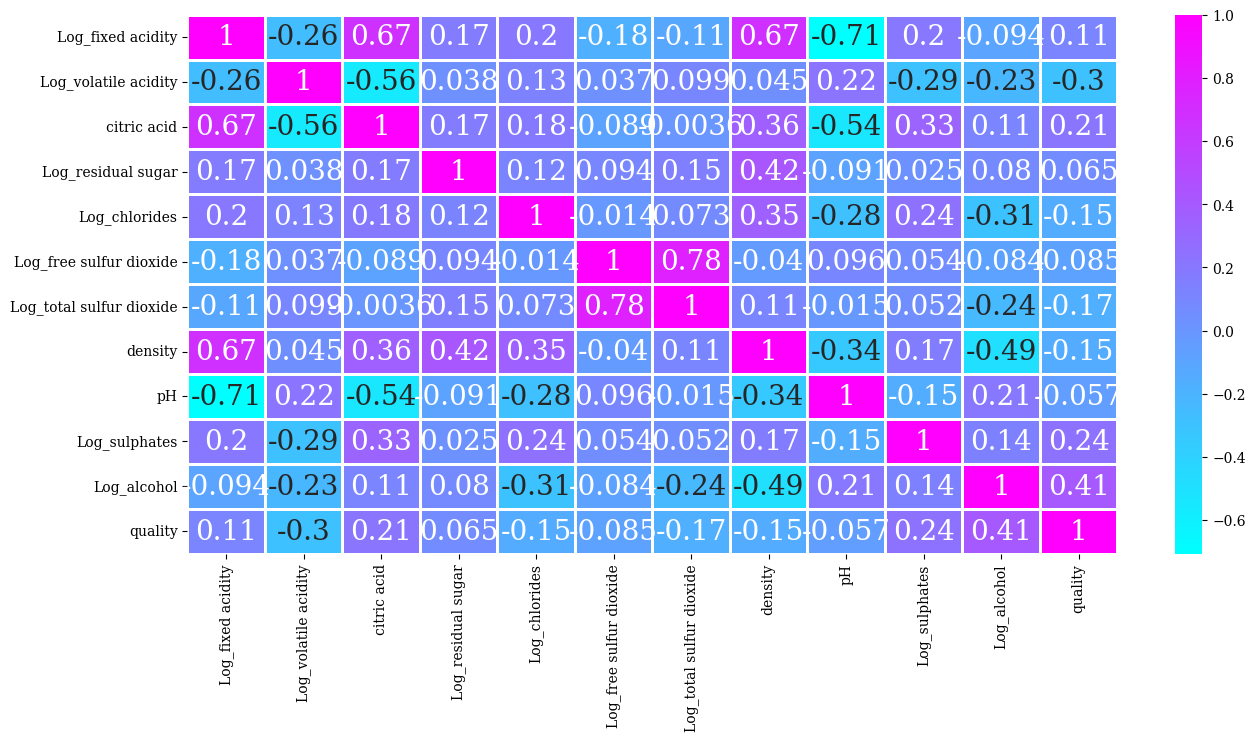

In [ ]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.heatmap(df_cp.corr(), annot=True,cmap = "cool",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":20})

/Users/lenovo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lenovo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lenovo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


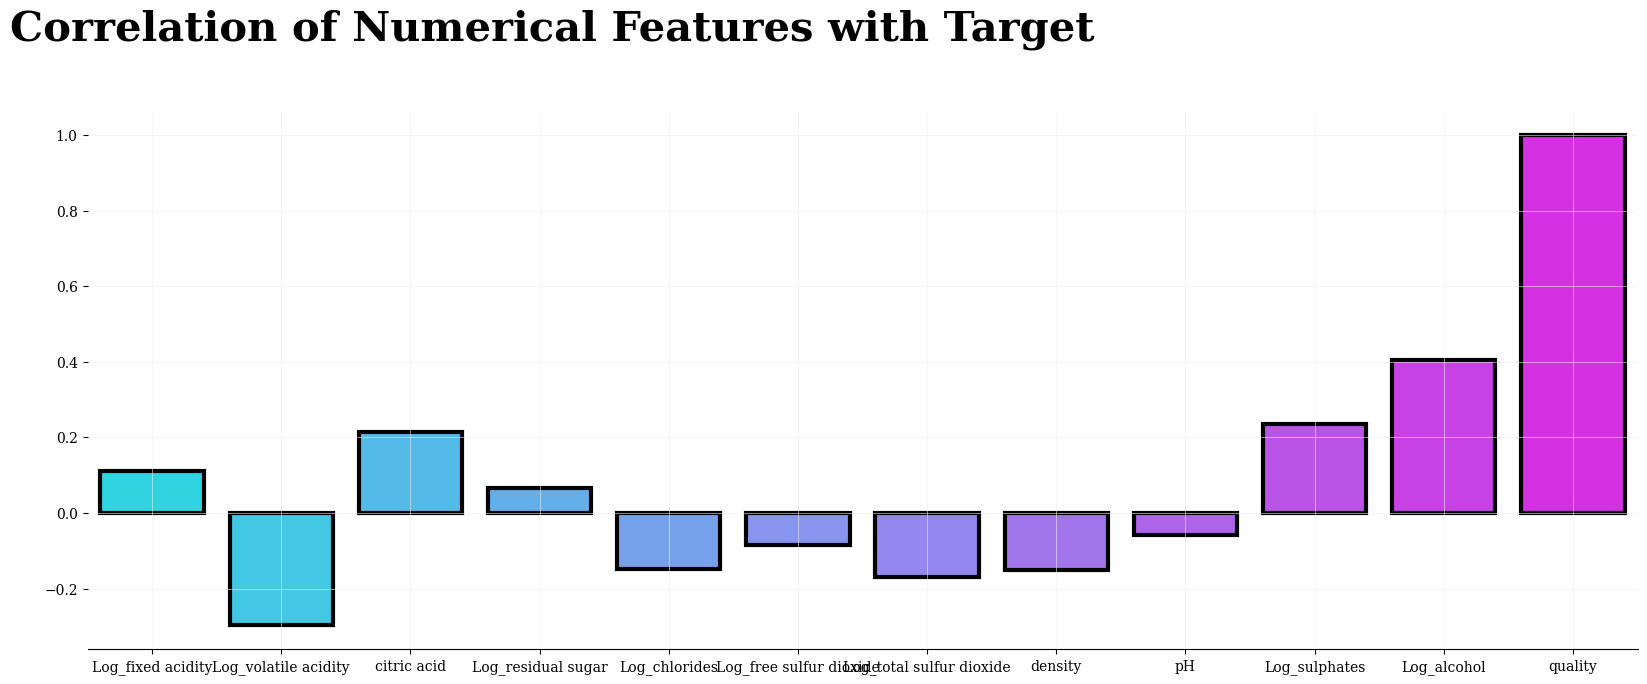

In [ ]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=30)

chart_df = pd.DataFrame(df.corrwith(df['quality']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, palette='cool',edgecolor="black",linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

### 9. PCA Implementation

주성분 분석(PCA)은 대규모 데이터 세트의 차원을 축소하는 방법으로, 많은 변수들의 집합을 정보의 대부분을 여전히 포함하고 있는 더 작은 집합으로 변환함으로써 자주 사용된다. 데이터 세트의 변수 수를 줄이면 정확도를 손실할 수밖에 없지만, 차원 축소의 요령은 약간의 정확도를 단순화함과 교환하는 것이다. 왜냐하면 더 작은 데이터세트는 탐색하고 시각화하기가 쉽고, 머신러닝 알고리즘이 불필요한 변수들을 처리하지 않고도 데이터 분석을 훨씬 쉽고 더 빠르게 할 수 있기에 더 좋은 결과가 나올 수 있다. 

**How it works?**<br>
1. 표준화.<br>
2. 공분산 행렬(covariance matrix) 계산.<br>
3. 공분산 행렬의 고유벡터와 고유값을 계산하여 주성분(principal components)을 식별.<br>
4. Feature 벡터.<br>
5. 데이터를 주성분(Principal components 축을 따라 재배치.<br> 

### Q2. 위 PCA 설명을 참고해 Red wine Quality data set에 PCA를 implement해야 하는 이유를 설명해보자
<br> 따로 정답 없음! 자유롭게 고민~!

- 피처 그대로 하면 너무 많음. 오래 걸림
- 상관관계 높은 피처들 몇개 빼도 괜찮을지도

In [17]:
#Feature Variables
x = df_cp.drop('quality',axis=1)
#Target Variable
Y = df_cp['quality']

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)

In [37]:
df_cp.columns

Index(['volatile acidity', 'citric acid', 'density', 'pH', 'quality',
       'Log_fixed acidity', 'Log_alcohol', 'Log_sulphates',
       'Log_residual sugar', 'Log_chlorides', 'Log_free sulfur dioxide',
       'Log_total sulfur dioxide'],
      dtype='object')

In [32]:
df_cp.drop('fixed acidity',axis=1,inplace=True)

In [35]:
# applying PCA for dimensionality reduction
pca = PCA(n_components = None)

# fit_transform은 학습 데이터에만 사용하고, 테스트 데이터에는 transform만 사용해야함을 주의!!
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[7.17072984e-01 1.82926804e-01 3.01660022e-02 2.51397979e-02
 2.02464390e-02 1.21547450e-02 6.16022389e-03 2.30340509e-03
 2.26650494e-03 1.41791083e-03 1.45078123e-04 1.04760848e-07]


In [36]:
len(explained_variance)

12

### Q3. explained_variance가 11이라는 것은 무엇을 의미할까?
> 11개의 축으로 PCA를 진행했다.<br>
> 각각은 한개의 축이 원래 variance의 몇 퍼센트를 설명하는지 의미

In [25]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.7170729836890999, 0.1829268044832548, 0.03016600224234875, 0.02513979786715686, 0.020246439046903073, 0.012154745032512966, 0.006160223891589036, 0.0023034050875174504, 0.0022665049433717847, 0.0014179108325904435, 0.0001450781228071353, 1.0476084769902726e-07]


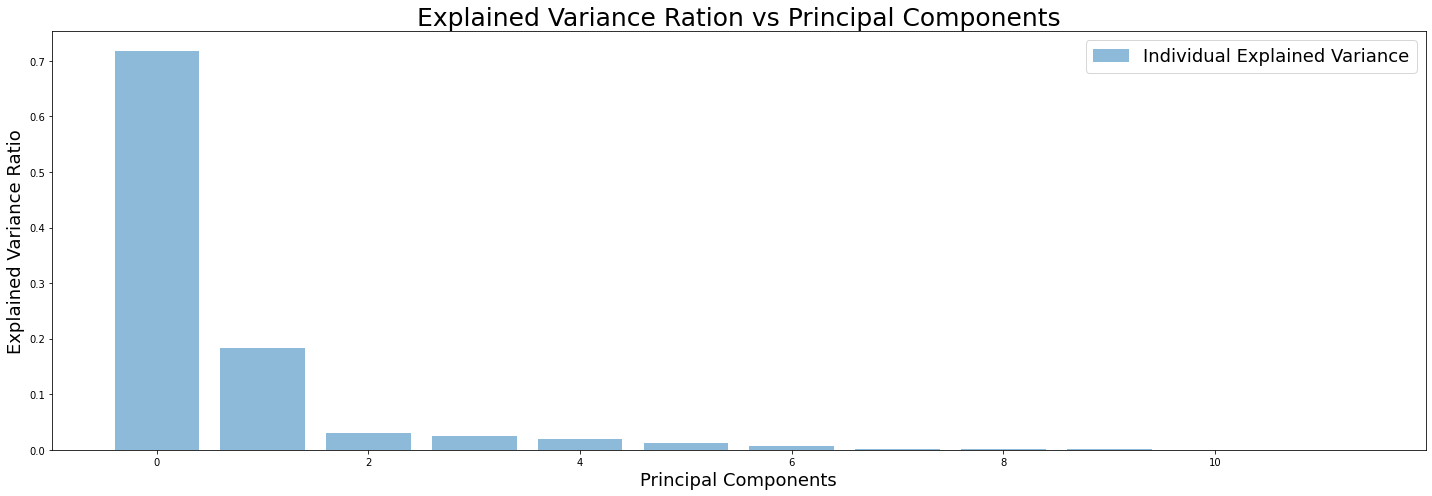

In [38]:
fig = plt.figure(figsize=(20,7))
plt.bar(range(12), explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Explained Variance Ration vs Principal Components',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
plt.tight_layout()
plt.show()

**주성분 축 중 데이터셋을 잘 설명하는 top5 선택**

In [39]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.71707298 0.1829268  0.030166   0.0251398  0.02024644]


### 10. Model Creation (생략!) 
읽고만 넘어가기

코드 에러로 모델 선택 과정은 생략!<br>
RandomForestClassifier, AdaBoostClassifier, Gradient Boosting, DescisionTreeClassifier 중에서 <br>
**AdaBoosting이 가장 좋은 성능을 보임**<br><br>
AdaBoostClassifier 선택!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, Y_train)
Y_pred = dtc.predict(x_test)
confusion_matrix(Y_test, Y_pred)

array([[323,  28],
       [ 26,  23]])

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(x_test)  

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, Y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

### 11. Final Model

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm= "SAMME", learning_rate= 0.1, n_estimators= 90)
ada.fit(x_train, Y_train)

/Users/lenovo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5),
                   learning_rate=0.1, n_estimators=90)

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[328  23]
 [ 33  16]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       351
           1       0.41      0.33      0.36        49

    accuracy                           0.86       400
   macro avg       0.66      0.63      0.64       400
weighted avg       0.85      0.86      0.85       400



In [ ]:
print(accuracy_score(Y_test, Y_pred))

0.86


### Conclusion

red wine quality 데이터셋은 불균형 데이터셋이기 때문에,  에이다부스트(Ada boost), 의사결정트리(Decision tree), 랜덤 포레스트 트리(Random forest tree)와 같은 트리 기반 알고리즘만을 사용해봄.
(트리 기반 알고리즘의 장점 중 하나는 불균형 데이터셋을 다루는 데 특화되어 있다는 것)
최종적으로 AdaBoosting 분류는 좋은 정확도, <b>87%</b>를 제공.